In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
import keras
print(keras.__version__)

2.15.0


In [ ]:
! cp kaggle.json ~/.kaggle

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d pateljay731/panama-electricity-load-forecasting

Dataset URL: https://www.kaggle.com/datasets/pateljay731/panama-electricity-load-forecasting
License(s): unknown
panama-electricity-load-forecasting.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip panama-electricity-load-forecasting.zip

Archive:  panama-electricity-load-forecasting.zip
replace Predict_Jan.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [111]:
df=pd.read_csv('train.csv')

In [48]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dropout, Flatten

In [112]:
# Assuming df is your DataFrame with datetime column converted to datetime format
df['datetime'] = pd.to_datetime(df['datetime'], format='%d-%m-%Y %H:%M')

# Filter out rows where the time is '01:00:00'
filtered_df = df[df['datetime'].dt.time == pd.to_datetime('01:00:00').time()]

In [113]:
filtered_df.reset_index(drop=True, inplace=True)

In [114]:
filtered_df['datetime'] = filtered_df['datetime'].dt.date

C:\Users\Aniket\AppData\Local\Temp\ipykernel_22684\3991792268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['datetime'] = filtered_df['datetime'].dt.date


In [115]:
df = filtered_df

In [116]:
df.head()

,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school
0,2015-01-03,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0
1,2015-01-04,944.0556,25.681818,0.018494,0.003898,19.893350,23.627130,0.017540,0.006481,8.287433,22.533380,0.016747,0.085571,4.433089,0,0,0
2,2015-01-05,928.5338,25.689905,0.018423,0.018112,20.812843,23.510217,0.016660,0.007763,11.819470,22.400842,0.015913,0.082062,6.599681,0,0,0
3,2015-01-06,914.6895,25.441034,0.017628,0.024033,28.399832,23.605096,0.016590,0.008877,14.222410,22.284784,0.015835,0.088104,7.670477,0,0,0
4,2015-01-07,940.4568,24.863245,0.016943,0.015156,20.156554,22.425745,0.016386,0.015404,10.078216,21.761682,0.015573,0.100281,6.593827,0,0,0


In [117]:
print(df.dtypes)

datetime       object
nat_demand    float64
T2M_toc       float64
QV2M_toc      float64
TQL_toc       float64
W2M_toc       float64
T2M_san       float64
QV2M_san      float64
TQL_san       float64
W2M_san       float64
T2M_dav       float64
QV2M_dav      float64
TQL_dav       float64
W2M_dav       float64
Holiday_ID      int64
holiday         int64
school          int64
dtype: object


In [118]:
df.isnull().sum()

datetime      0
nat_demand    0
T2M_toc       0
QV2M_toc      0
TQL_toc       0
W2M_toc       0
T2M_san       0
QV2M_san      0
TQL_san       0
W2M_san       0
T2M_dav       0
QV2M_dav      0
TQL_dav       0
W2M_dav       0
Holiday_ID    0
holiday       0
school        0
dtype: int64

In [119]:
# Convert 'datetime' column to datetime format
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d')

# Now you can use .dt accessor
df['week_day'] = df['datetime'].dt.dayofweek
df['date'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
# df['hour'] = df['datetime'].dt.hour

# Display the DataFrame head
df.head()


,datetime,nat_demand,T2M_toc,QV2M_toc,TQL_toc,W2M_toc,T2M_san,QV2M_san,TQL_san,W2M_san,T2M_dav,QV2M_dav,TQL_dav,W2M_dav,Holiday_ID,holiday,school,week_day,date,month
0,2015-01-03,970.3450,25.865259,0.018576,0.016174,21.850546,23.482446,0.017272,0.001855,10.328949,22.662134,0.016562,0.096100,5.364148,0,0,0,5,3,1
1,2015-01-04,944.0556,25.681818,0.018494,0.003898,19.893350,23.627130,0.017540,0.006481,8.287433,22.533380,0.016747,0.085571,4.433089,0,0,0,6,4,1
2,2015-01-05,928.5338,25.689905,0.018423,0.018112,20.812843,23.510217,0.016660,0.007763,11.819470,22.400842,0.015913,0.082062,6.599681,0,0,0,0,5,1
3,2015-01-06,914.6895,25.441034,0.017628,0.024033,28.399832,23.605096,0.016590,0.008877,14.222410,22.284784,0.015835,0.088104,7.670477,0,0,0,1,6,1
4,2015-01-07,940.4568,24.863245,0.016943,0.015156,20.156554,22.425745,0.016386,0.015404,10.078216,21.761682,0.015573,0.100281,6.593827,0,0,0,2,7,1


<Axes: xlabel='datetime'>

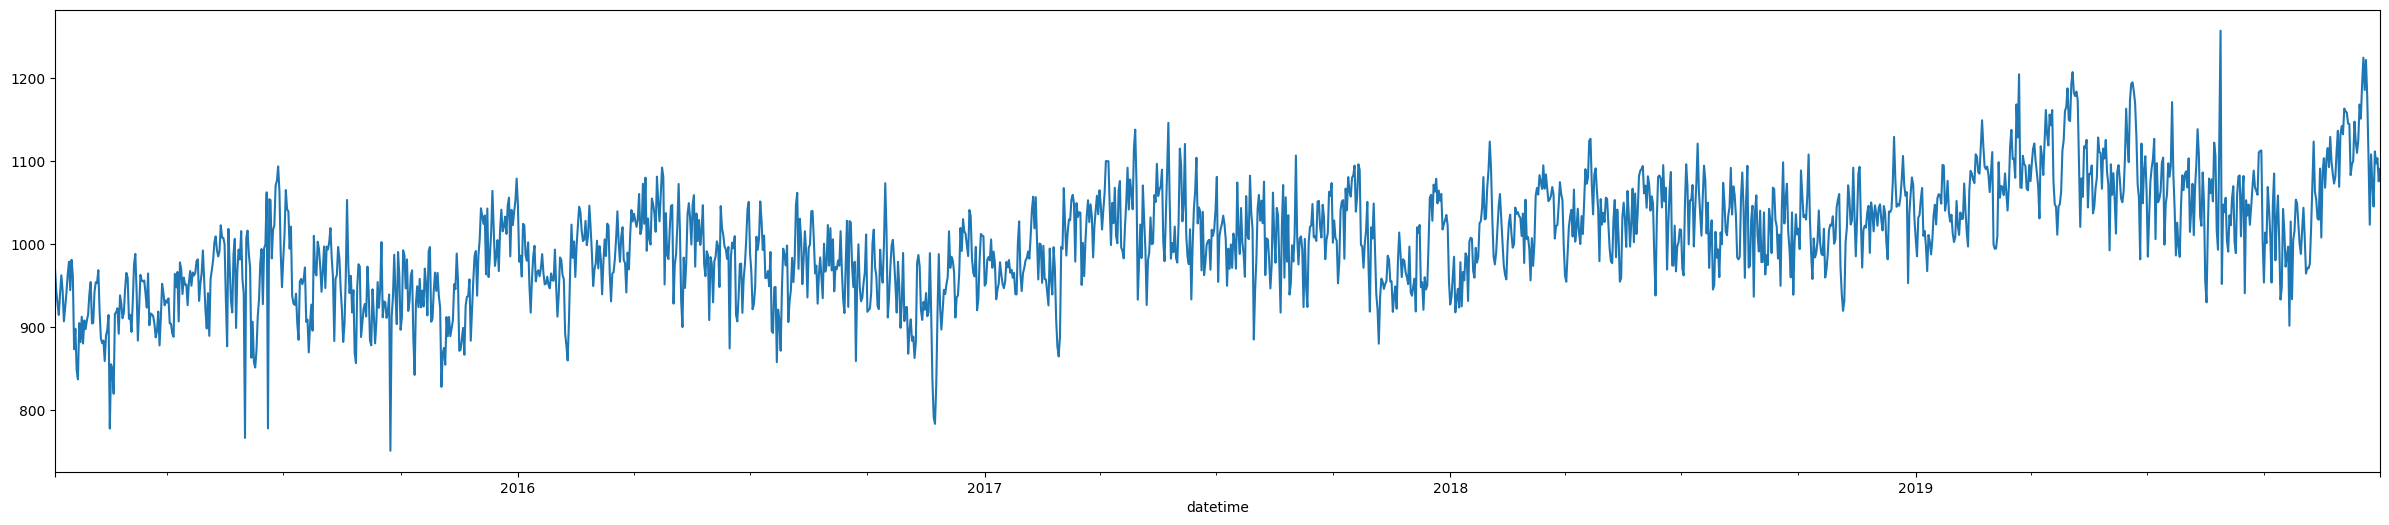

In [120]:
from matplotlib.pyplot import figure
figure(figsize=(30, 6))
ddd=df[0:15000]
ddd.groupby('datetime')['nat_demand'].median().plot()

In [121]:
def add_features(df):
    df['T2M_toc_s']=df['T2M_toc'].shift(-1).fillna(0)
    df['QV2M_toc_s']=df['QV2M_toc'].shift(-1).fillna(0)
    df['TQL_toc_s']=df['TQL_toc'].shift(-1).fillna(0)
    df['W2M_toc_s']=df['W2M_toc'].shift(-1).fillna(0)
    df['T2M_toc_s']=df['T2M_san'].shift(-1).fillna(0)
    df['QV2M_san_s']=df['QV2M_san'].shift(-1).fillna(0)
    df['TQL_san_s']=df['TQL_san'].shift(-1).fillna(0)
    df['W2M_san_s']=df['W2M_san'].shift(-1).fillna(0)
    df['T2M_dav_s']=df['T2M_dav'].shift(-1).fillna(0)
    df['QV2M_dav_s']=df['QV2M_dav'].shift(-1).fillna(0)
    df['TQL_dav_s']=df['TQL_dav'].shift(-1).fillna(0)
    df['W2M_dav_s']=df['W2M_dav'].shift(-1).fillna(0)
    df['Holiday_ID_s']=df['Holiday_ID'].shift(-1).fillna(0)
    df['holiday_s']=df['holiday'].shift(-1).fillna(0)
    df['school_s']=df['school'].shift(-1).fillna(0)

    df['T2M_toc_s1']=df['T2M_toc'].shift(-2).fillna(0)
    df['QV2M_toc_s1']=df['QV2M_toc'].shift(-2).fillna(0)
    df['TQL_toc_s1']=df['TQL_toc'].shift(-2).fillna(0)
    df['W2M_toc_s1']=df['W2M_toc'].shift(-2).fillna(0)
    df['T2M_toc_s1']=df['T2M_san'].shift(-2).fillna(0)
    df['QV2M_san_s1']=df['QV2M_san'].shift(-2).fillna(0)
    df['TQL_san_s1']=df['TQL_san'].shift(-2).fillna(0)
    df['W2M_san_s1']=df['W2M_san'].shift(-2).fillna(0)
    df['T2M_dav_s1']=df['T2M_dav'].shift(-2).fillna(0)
    df['QV2M_dav_s1']=df['QV2M_dav'].shift(-2).fillna(0)
    df['TQL_dav_s1']=df['TQL_dav'].shift(-2).fillna(0)
    df['W2M_dav_s1']=df['W2M_dav'].shift(-2).fillna(0)

    df['nat_demand3']=df['nat_demand'].shift(3).fillna(0)
    df['nat_demand4']=df['nat_demand'].shift(4).fillna(0)
    df['nat_demand5']=df['nat_demand'].shift(5).fillna(0)
    df['nat_demand6']=df['nat_demand'].shift(6).fillna(0)
    df['nat_demand7']=df['nat_demand'].shift(7).fillna(0)
    df['nat_demand8']=df['nat_demand'].shift(8).fillna(0)
    df['nat_demand9']=df['nat_demand'].shift(9).fillna(0)
    df['nat_demand10']=df['nat_demand'].shift(10).fillna(0)
    df['nat_demand11']=df['nat_demand'].shift(11).fillna(0)
    df['nat_demand12']=df['nat_demand'].shift(12).fillna(0)
    df['nat_demand13']=df['nat_demand'].shift(13).fillna(0)
    df['nat_demand14']=df['nat_demand'].shift(14).fillna(0)
    df['nat_demand_n']=df['nat_demand']
    #df = pd.get_dummies(df)
    return df

In [122]:
df1 = df

In [123]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1824 entries, 0 to 1823
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    1824 non-null   datetime64[ns]
 1   nat_demand  1824 non-null   float64       
 2   T2M_toc     1824 non-null   float64       
 3   QV2M_toc    1824 non-null   float64       
 4   TQL_toc     1824 non-null   float64       
 5   W2M_toc     1824 non-null   float64       
 6   T2M_san     1824 non-null   float64       
 7   QV2M_san    1824 non-null   float64       
 8   TQL_san     1824 non-null   float64       
 9   W2M_san     1824 non-null   float64       
 10  T2M_dav     1824 non-null   float64       
 11  QV2M_dav    1824 non-null   float64       
 12  TQL_dav     1824 non-null   float64       
 13  W2M_dav     1824 non-null   float64       
 14  Holiday_ID  1824 non-null   int64         
 15  holiday     1824 non-null   int64         
 16  school      1824 non-nul

In [124]:
col=['datetime']
demand=df1['nat_demand']
new_df= df1.drop(columns=col)
df_for_training = new_df.astype(float)

# print(df_for_training)

In [125]:
df_for_training.shape

(1824, 19)

In [126]:
import joblib

In [127]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [128]:
joblib.dump(scaler, 'scaler_MT.joblib')

['scaler_MT.joblib']

In [129]:
df_for_training_scaled

array([[0.43336192, 0.5522116 , 0.61427046, ..., 0.83333333, 0.06666667,
        0.        ],
       [0.38141418, 0.51265227, 0.60435126, ..., 1.        , 0.1       ,
        0.        ],
       [0.35074317, 0.51439628, 0.59582088, ..., 0.        , 0.13333333,
        0.        ],
       ...,
       [0.69647226, 0.7409723 , 0.79449222, ..., 1.        , 0.93333333,
        1.        ],
       [0.64138328, 0.63450237, 0.74975236, ..., 0.        , 0.96666667,
        1.        ],
       [0.67089398, 0.53564025, 0.6010677 , ..., 0.16666667, 1.        ,
        1.        ]])

In [130]:
scaler

MinMaxScaler()

In [131]:
X=np.array(df_for_training)
print(X)

[[9.70345000e+02 2.58652588e+01 1.85763820e-02 ... 5.00000000e+00
  3.00000000e+00 1.00000000e+00]
 [9.44055600e+02 2.56818176e+01 1.84937400e-02 ... 6.00000000e+00
  4.00000000e+00 1.00000000e+00]
 [9.28533800e+02 2.56899048e+01 1.84226690e-02 ... 0.00000000e+00
  5.00000000e+00 1.00000000e+00]
 ...
 [1.10349830e+03 2.67405640e+01 2.00779030e-02 ... 6.00000000e+00
  2.90000000e+01 1.20000000e+01]
 [1.07561920e+03 2.62468506e+01 1.97051520e-02 ... 0.00000000e+00
  3.00000000e+01 1.20000000e+01]
 [1.09055380e+03 2.57884155e+01 1.84663830e-02 ... 1.00000000e+00
  3.10000000e+01 1.20000000e+01]]


In [133]:
trainX = []
trainY = []
trainY = df_for_training['nat_demand'].to_numpy().reshape(-1,1)
trainX = df_for_training.to_numpy().reshape(-1, 19,1)
#trainY = df[['pressure']].to_numpy().reshape(-1, 80)
#trainX = df.reshape(-1, 80, df.shape[-1])      df_for_training.shape[-1]

In [134]:
df_for_training.shape

(1824, 19)

In [136]:
trainX = []
trainY = []
n_future = 1
n_past = 24
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
   trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
   trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

In [137]:
trainX, trainY = np.array(trainX), np.array(trainY)
# print(trainX.shape)
print(trainY)

[[0.28945391]
 [0.31021451]
 [0.32449405]
 ...
 [0.69647226]
 [0.64138328]
 [0.67089398]]


In [138]:
# np.set_printoptions(precision=3)
# np.set_printoptions(suppress=True)
# np.set_printoptions(threshold=2000)
#p = PrintArray(precision=4, linewidth=150, suppress=True)
trainX.shape[1]


24

In [159]:
#keras tunner scripts
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam, RMSprop
import numpy as np

# Define a function for creating the hypermodel
def build_model(hp):
    model = keras.Sequential()

    # Number of LSTM layers (1 to 3)
    num_lstm_layers = hp.Int("num_lstm_layers", 1, 5)

    for i in range(num_lstm_layers):
        # Number of units in each LSTM layer (64 to 256)
        units = hp.Int(f"lstm_units_{i}", min_value=32, max_value=512, step=32)
        
        # Return sequences for all but the last LSTM layer
        return_sequences = i < (num_lstm_layers - 1)
        model.add(layers.LSTM(units, return_sequences=return_sequences))
        
        # Optional Dropout
        if hp.Boolean("add_dropout"):
            dropout_rate = hp.Float("dropout_rate", 0.1, 0.5, step=0.1)
            model.add(layers.Dropout(dropout_rate))

    # Number of Dense layers (1 to 3)
    num_dense_layers = hp.Int("num_dense_layers", 1, 4)
    for _ in range(num_dense_layers):
        units = hp.Int(f"dense_units_{_}", min_value=16, max_value=128, step=16)
        model.add(layers.Dense(units, activation='relu'))

    # Final output layer with number of outputs
    model.add(layers.Dense(trainY.shape[1]))

    # Optimizer choice
    optimizer = hp.Choice("optimizer", ["adam", "rmsprop"])
    
    # Compile model
    model.compile(
        loss='mse',
        optimizer=optimizer,
        metrics=['mse']
    )
    
    return model

# Initialize a RandomSearch tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_mse',  # Validation MSE as the objective to minimize
    max_trials=15,  # Number of different model configurations to try
    executions_per_trial=2,  # Number of times to run each trial
    directory='my_lstm_tuner',  # Directory to store results
    project_name='lstm_tuning_project'
)

# Example data for training (replace with your actual data)
# trainX = np.random.rand(100, 10, 5)  # Random example data
# trainY = np.random.rand(100, 3)  # Random example target

# Start the tuning process with the tuner.search method
tuner.search(
    trainX,
    trainY,
    validation_split=0.2,  # 20% validation split
    epochs=10,  # You can increase this number for more accurate results
    callbacks=[
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
    ]  # Early stopping to prevent overfitting
)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Summary of the best model
best_model.summary()

# Optional: Get the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print(best_hyperparameters.values)


Trial 15 Complete [00h 00m 39s]
val_mse: 0.01682300353422761

Best val_mse So Far: 0.008413915056735277
Total elapsed time: 00h 26m 53s


c:\Users\Aniket\OneDrive\Desktop\STLF\STLF\backend\Lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 11 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (32, 64)               │        21,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 48)               │         3,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 64)               │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 1)                │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,825 (108.69 KB)

 Trainable params: 27,825 (108.69 KB)

 Non-trainable params: 0 (0.00 B)

{'num_lstm_layers': 1, 'lstm_units_0': 64, 'add_dropout': False, 'num_dense_layers': 2, 'dense_units_0': 48, 'optimizer': 'rmsprop', 'lstm_units_1': 64, 'lstm_units_2': 64, 'lstm_units_3': 128, 'lstm_units_4': 448, 'dense_units_1': 64, 'dense_units_2': 16, 'dense_units_3': 16, 'dropout_rate': 0.2}


In [153]:
model = Sequential()
# model.add(Bidirectional(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]),return_sequences=True)))
#                              #return_sequences=True))
# model.add(Bidirectional(LSTM(32, activation='relu', return_sequences=True)))
# # model.add(LSTM(64, activation='relu', return_sequences=True))
# model.add(Bidirectional(LSTM(24, activation='relu', return_sequences=False)))
# # model.add(Dropout(0.2))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))#, return_sequences=False))
# model.add(Dense(32, activation='relu'))#, return_sequences=False))
# model.add(Dense(8, activation='relu'))#, return_sequences=False))
# model.add(Dense(trainY.shape[1]))


# model.compile(optimizer='adam', loss='mse',metrics=['mse'])




#model 2

model.add(LSTM(256, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
# model.add(Dropout(0.2))
model.add(LSTM(128,return_sequences=True))
model.add(LSTM(64))
# model.add(LSTM(64))
# model.add(Dropout(0.2))
model.add(Dense(6))

# Add Dense layers for final output
model.add(Dense(32, activation='relu'))
# model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
 # Add activation for dense layer
model.add(Dense(trainY.shape[1]))

# Compile the model
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
model.summary()

c:\Users\Aniket\OneDrive\Desktop\STLF\STLF\backend\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_15 (LSTM)                  │ (None, 24, 256)        │       282,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 24, 128)        │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 6)              │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 32)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 530,039 (2.02 MB)

 Trainable params: 530,039 (2.02 MB)

 Non-trainable params: 0 (0.00 B)

In [154]:
history = model.fit(trainX, trainY, epochs=25, batch_size=10,verbose=1,validation_split=0.2)
#validation_split=0.2,


Epoch 1/25
144/144 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.0361 - mse: 0.0361 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 2/25
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0128 - mse: 0.0128 - val_loss: 0.0520 - val_mse: 0.0520
Epoch 3/25
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0334 - val_mse: 0.0334
Epoch 4/25
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0205 - val_mse: 0.0205
Epoch 5/25
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0253 - val_mse: 0.0253
Epoch 6/25
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0141 - val_mse: 0.0141
Epoch 7/25
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0068 - mse: 0.0068 - val_loss: 0.0152 - val_mse: 0.0152
Epoch 8/25
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0060 - mse: 0.0060 - val_loss: 0.0137 - val_mse: 0.0137
Epoch 9/25
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/

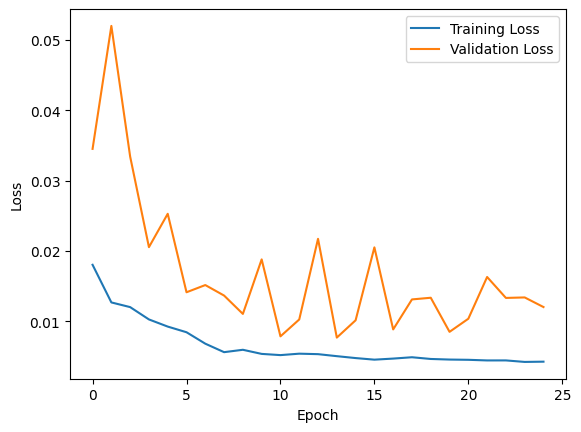

In [155]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [103]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_6 (Bidirectional) │ (16, 24, 128)          │        62,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ (16, 24, 64)           │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_8 (Bidirectional) │ (16, 48)               │        17,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (16, 48)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (16, 64)               │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (16, 32)               │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (16, 8)                │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (16, 1)                │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 380,309 (1.45 MB)

 Trainable params: 126,769 (495.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 253,540 (990.39 KB)

In [160]:
df_test= pd.read_csv('test_load_forecast.csv',encoding="latin-1")
# print(df_test.shape)
# Assuming df is your DataFrame with datetime column converted to datetime format
# df_test['datetime'] = pd.to_datetime(df_test['datetime'], format='%d-%m-%Y %H:%M')

# Filter out rows where the time is '01:00:00'
# filtered_df = df_test[df_test['datetime'].dt.time == pd.to_datetime('01:00:00').time()]
# filtered_df.reset_index(drop=True, inplace=True)
# filtered_df['datetime'] = filtered_df['datetime'].dt.date
# df_test = filtered_df
df_test['datetime']=pd.to_datetime(df_test['datetime'],format='%d-%m-%Y')
df_test['week_day']=df_test['datetime'].dt.dayofweek
df_test['date']=df_test['datetime'].dt.day
df_test['month']=df_test['datetime'].dt.month
# df_test['hour']=df_test['datetime'].dt.hour
df_test = (df_test)
df_for_pred=df_test.drop(columns=col)
print(df_for_pred.shape)
df_fo_testing=df_for_pred.astype(float)
df_pred_scaled=scaler.transform(df_fo_testing)
print(df_pred_scaled.shape)
X_pred = []
for i in range(n_past, len(df_pred_scaled) - n_future +1):
    X_pred.append(df_pred_scaled[i - n_past:i, 0:df_fo_testing.shape[1]])
X_pred= np.array(X_pred)

print('X for prediction shape == {}.'.format(X_pred.shape))

(1000, 19)
(1000, 19)
X for prediction shape == (976, 24, 19).


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


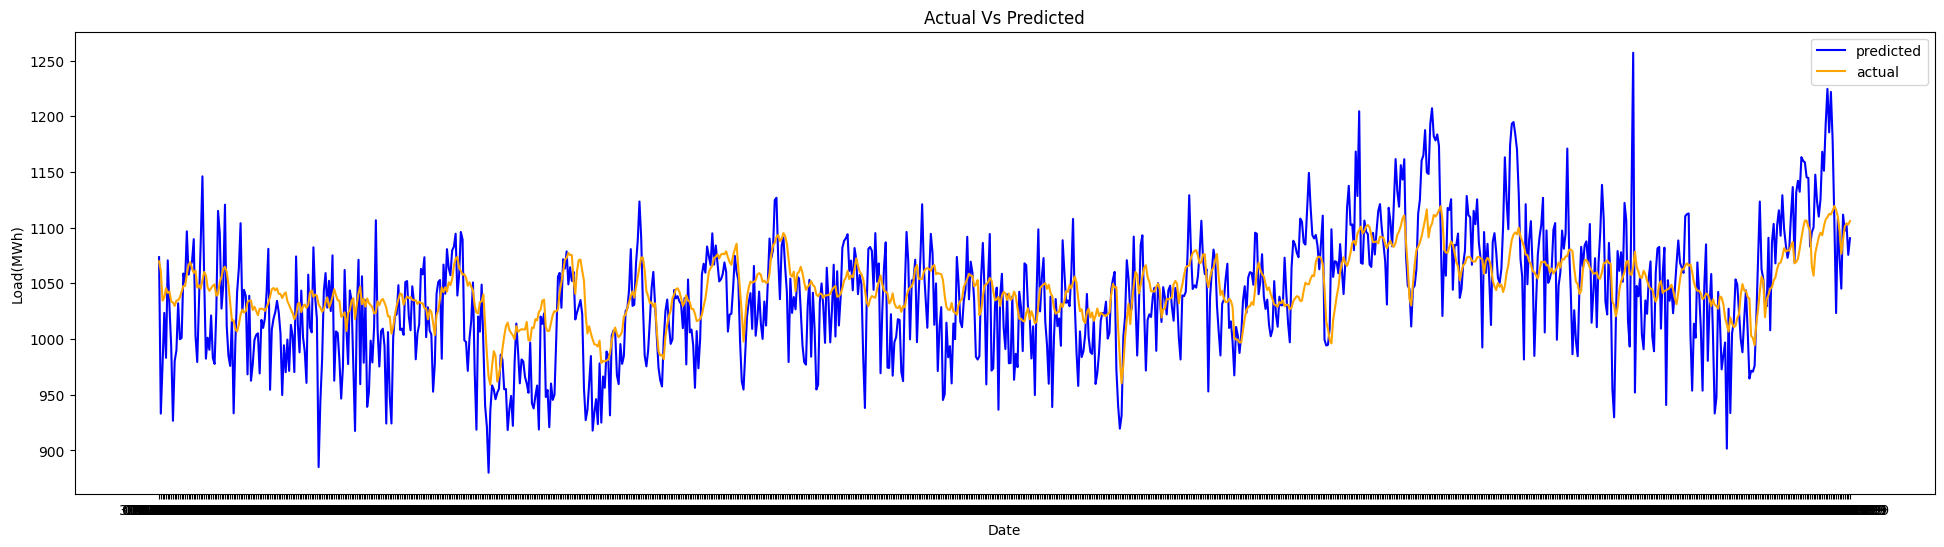

In [161]:
prediction = best_model.predict(X_pred)
prediction_copies = np.repeat(prediction, df_fo_testing.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]
y_pred_future
df_forecast=[]
df_forecast = pd.DataFrame(y_pred_future)
temp_df=[]
temp_df=pd.DataFrame(np.zeros(n_past))
df_forecast =pd.concat([temp_df,df_forecast], ignore_index=True)
df_forecast
df_actual= pd.read_csv('test_load_forecast.csv',encoding="latin-1")
df_actual['Pred_nat_demand']=df_forecast
df_actual = df_actual.iloc[n_past:]
df_actual
# a4_dims = (25,8)
# fig, ax = plt.subplots(figsize=a4_dims)
# sns.lineplot((df_actual['datetime'], df_actual['nat_demand']))
# sns.lineplot((df_actual['datetime'], df_actual['Pred_nat_demand']))
plt.figure(figsize=(24, 6))
plt.plot(df_actual['datetime'], df_actual['nat_demand'], label='predicted', color='blue')
plt.plot(df_actual['datetime'],df_actual['Pred_nat_demand'] , label='actual', color='orange')
plt.title('Actual Vs Predicted')
plt.xlabel('Date')
plt.ylabel('Load(MWh)')
plt.legend()
plt.show()

In [162]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.optimizers import SGD
trainScore = math.sqrt(mean_squared_error(df_actual['Pred_nat_demand'], df_actual['nat_demand']))
print( 'Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(df_actual['Pred_nat_demand'], df_actual['nat_demand']))
print( 'Test Score: %.2f RMSE' % (testScore))

#calculate mean absolute percent error
trainMAPE = mean_absolute_error(df_actual['Pred_nat_demand'], df_actual['nat_demand'])
print('trainMAPE: %.2f MAPE' % trainMAPE)
testMAPE = mean_absolute_error(df_actual['Pred_nat_demand'], df_actual['nat_demand'])
print('testMAPE: %.2f MAPE' % testMAPE)

#calculate mean square error
trainmse = mean_squared_error(df_actual['Pred_nat_demand'], df_actual['nat_demand'])
print('TrainMSE: %.2f MSE' % trainmse)
testmse = mean_squared_error(df_actual['Pred_nat_demand'], df_actual['nat_demand'])
print('TestMSE: %.2f MSE' % testmse)
trainKPI = [];
trainKPI.extend([trainMAPE,trainScore,trainmse])
testKPI = [];
testKPI.extend([testMAPE,testScore,testmse])
print('trainKPI',trainKPI)
print('testKPI',testKPI)

# print('train_size',train_size)
# print('test_size',test_size)

Train Score: 43.67 RMSE
Test Score: 43.67 RMSE
trainMAPE: 34.42 MAPE
testMAPE: 34.42 MAPE
TrainMSE: 1906.72 MSE
TestMSE: 1906.72 MSE
trainKPI [34.424209747698676, 43.666049997220824, 1906.7239223597885]
testKPI [34.424209747698676, 43.666049997220824, 1906.7239223597885]


In [ ]:
data= pd.read_csv('test_load_forecast.csv')
predicted_y=[]
dates=[]
previousData=[]
time=[]
for i in range(24):
  df_test1=data.iloc[i:i+48]
  df_test1['datetime']=pd.to_datetime(df_test1['datetime'],format='%d-%m-%Y')

  df_test1['week_day']=df_test1['datetime'].dt.dayofweek
  df_test1['date']=df_test1['datetime'].dt.day
  df_test1['month']=df_test1['datetime'].dt.month
  # df_test1['hour']=df_test1['datetime'].dt.hour
  # df.head()
  date=data.iloc[i+48,0]
  date=pd.to_datetime(date,format='%d-%m-%Y')
  # time.append(date.dt.time)


  previousData.append(data.iloc[i+48,1])
  df_test2 = (df_test1)

  # df_test1 = add_features(df_test1)
  # print(df_test1.head())
  col=['datetime']
  new_df_test2= df_test2.drop(columns=col)
  df_for_testing1 = new_df_test2.astype(float)
  # print(df_for_testing1)
  # df_for_pred1=df_test1.drop(columns=['datetime'])
  # df_test1=df_for_pred1.astype(float)
  df_pred_scaled1=scaler.transform(df_for_testing1)

  # print(df_pred_scaled1)
  # print(df_test.sha)
  X_pred1 = []
  # for i in range(n_past, len(df_pred_scaled1) - n_future +1):

  X_pred1.append(df_pred_scaled1[0:48, 0:df_for_testing1.shape[1]])


  X_pred1= np.array(X_pred1)
  # print(X_pred1)

  print('X for prediction shape == {}.'.format(X_pred1.shape))
  prediction1 = model.predict(X_pred1)
  print(prediction1.shape)
  prediction1_copies = np.repeat(prediction1, df_for_testing1.shape[1], axis=-1)
  # print(prediction1_copies)
  y_pred_future1 = scaler.inverse_transform(prediction1_copies)[:,0]
  # print(y_pred_future1)
  predicted_y.append(y_pred_future1)
  dates.append(date)
  data.loc[i+48,'nat_demand']=y_pred_future1



# print(predicted_y)


In [36]:
predicted_y

[array([945.4588], dtype=float32),
 array([954.9072], dtype=float32),
 array([952.0858], dtype=float32),
 array([935.97815], dtype=float32),
 array([913.18756], dtype=float32),
 array([896.6631], dtype=float32),
 array([900.73566], dtype=float32),
 array([898.6061], dtype=float32),
 array([907.2536], dtype=float32),
 array([903.5739], dtype=float32),
 array([904.58905], dtype=float32),
 array([906.99036], dtype=float32),
 array([893.1886], dtype=float32),
 array([902.95636], dtype=float32),
 array([903.4843], dtype=float32),
 array([903.28174], dtype=float32),
 array([895.2482], dtype=float32),
 array([872.72394], dtype=float32),
 array([866.1923], dtype=float32),
 array([868.30316], dtype=float32),
 array([873.09143], dtype=float32),
 array([866.05365], dtype=float32),
 array([868.55414], dtype=float32),
 array([871.1456], dtype=float32)]

In [ ]:
previousData

[1086.3027,
 1146.1169,
 1054.9346,
 982.4278,
 1001.2198,
 990.4145,
 1021.1594,
 983.2242,
 977.7237,
 1024.516959,
 1115.0801,
 1095.1115,
 1027.402653,
 1047.9314,
 1120.6625,
 1011.7703,
 985.1806,
 975.8991,
 1017.8908,
 933.326695,
 997.4791,
 1042.1703,
 1063.5381,
 1104.0659]

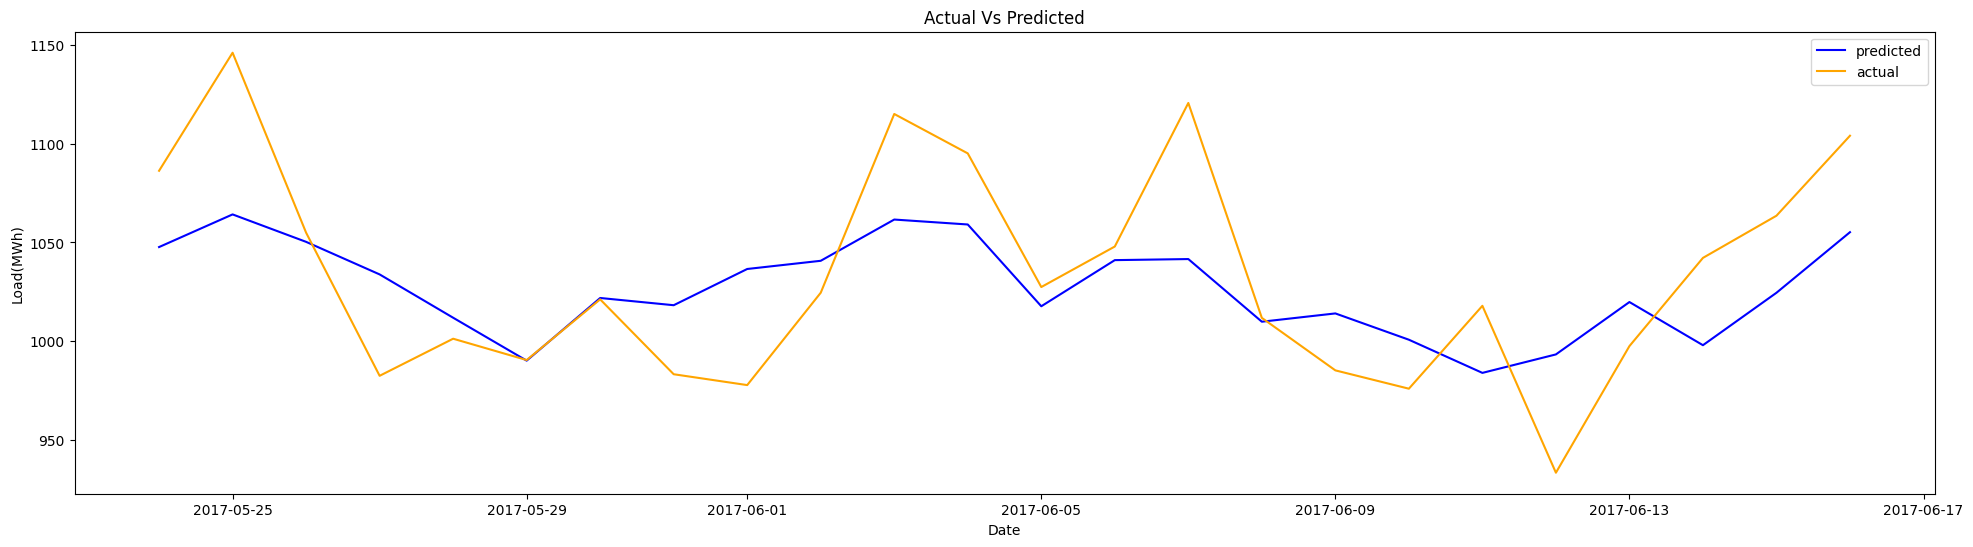

In [164]:
plt.figure(figsize=(24, 6))
plt.plot(dates, predicted_y, label='predicted', color='blue')
plt.plot(dates,previousData , label='actual', color='orange')
plt.title('Actual Vs Predicted')
plt.xlabel('Date')
plt.ylabel('Load(MWh)')
plt.legend()
plt.show()

In [165]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.optimizers import SGD
trainScore = math.sqrt(mean_squared_error(predicted_y, previousData))
print( 'Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(predicted_y, previousData))
print( 'Test Score: %.2f RMSE' % (testScore))

#calculate mean absolute percent error
trainMAPE = mean_absolute_error(predicted_y, previousData)
print('trainMAPE: %.2f MAPE' % trainMAPE)
testMAPE = mean_absolute_error(predicted_y, previousData)
print('testMAPE: %.2f MAPE' % testMAPE)

#calculate mean square error
trainmse = mean_squared_error(predicted_y, previousData)
print('TrainMSE: %.2f MSE' % trainmse)
testmse = mean_squared_error(predicted_y, previousData)
print('TestMSE: %.2f MSE' % testmse)
trainKPI = [];
trainKPI.extend([trainMAPE,trainScore,trainmse])
testKPI = [];
testKPI.extend([testMAPE,testScore,testmse])
print('trainKPI',trainKPI)
print('testKPI',testKPI)

# print('train_size',train_size)
# print('test_size',test_size)

Train Score: 40.33 RMSE
Test Score: 40.33 RMSE
trainMAPE: 32.81 MAPE
testMAPE: 32.81 MAPE
TrainMSE: 1626.85 MSE
TestMSE: 1626.85 MSE
trainKPI [32.80784755761718, 40.33417544392463, 1626.8457087412926]
testKPI [32.80784755761718, 40.33417544392463, 1626.8457087412926]


In [167]:
for i in range(len(best_model.weights)):
    best_model.weights[i].name = best_model.weights[i].name + "_" + str(i)
best_model.save('medium_term_LF.h5')

In [ ]:
# model.save_weights('shorterm_model_weights.h5')
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Create a folder to save in Google Drive
!mkdir /content/drive/MyDrive/my_folder_in_drive

# Copy content to the new Google Drive folder
!cp -r short_term_model//* /content/drive/MyDrive/my_folder_in_drive/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
mkdir: cannot create directory ‘/content/drive/MyDrive/my_folder_in_drive’: File exists
cp: cannot stat 'short_term_model//*': No such file or directory


In [ ]:
prediction1 = model.predict(X_pred1)
prediction1_copies = np.repeat(prediction1, df_for_testing1.shape[1], axis=-1)
y_pred_future1 = scaler.inverse_transform(prediction1_copies)[:,0]
print(y_pred_future1)

1/1 [==============================] - 0s 35ms/step
[959.4149]
